In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial import distance 

In [6]:
gaia = pd.read_csv('data/confirmed_mydata.csv', comment='#')
gaia_new = gaia.loc[:,['pl_orbper','pl_bmassj','pl_radj']]

#standardize gaia data
scaler = StandardScaler()
scaler.fit(gaia_new)
gaia_np_std = scaler.transform(gaia_new)

In [10]:
def looping_kmeans(arr,k_cluster):
    cohesion=[]
    for k in k_cluster:
        km_alg = KMeans(n_clusters=k, init="random",random_state = 1, max_iter = 200)
        fit3 = km_alg.fit(arr)
        labels = fit3.labels_
        centers = fit3.cluster_centers_

        cluster_cohesion = 0
        n = 0
        for c in centers:
            cluster_points = arr[labels==n]
            n = n+1

            cluster_dists = distance.cdist(cluster_points, cluster_points, 'euclidean')
            cluster_cohesion = np.sum(cluster_dists)/cluster_dists.shape[0]

            # Add this cluster's cohesion measure to the total cluster cohesion
            cluster_cohesion += cluster_cohesion
        cohesion.append(cluster_cohesion)
    return cohesion

Text(0, 0.5, 'cohesion')

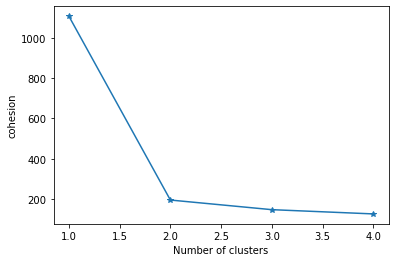

In [12]:
plt.plot(list(range(1,5)),looping_kmeans(gaia_np_std,list(range(1,5))),"*-")
plt.xlabel("Number of clusters")
plt.ylabel("cohesion")

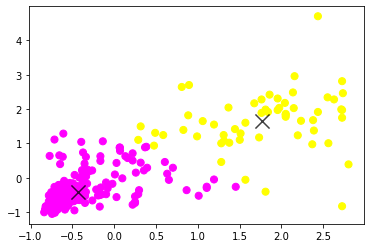

In [17]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(gaia_np_std)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Plot and color the points according to their label
plt.scatter(gaia_np_std[:,1], gaia_np_std[:,2], c=labels, s=50, cmap="spring")
# Add the cluster centers on top
plt.scatter(centers[:, 1], centers[:, 2], c='black', marker="x", s=200, alpha=0.75)